<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Ana Sofia Dürrmüller Acosta y Cristina Lobera De la Mora

**Fecha:** 23 de noviembre de 2021.

**Expediente** : Ana Sofia: if723489 y Cristina: if714997.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/anadurrmuller/Tarea8_ASDurrmuller_CLobera.git



# Tarea 8

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put' y además deben de
compararlo con los resultados teóricos del método de valuación de Black-Scholes (ecuación del principio)

In [1]:
# Procedimineto de Ana Sofia

In [2]:
#importar las paqueterias
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline

#opciones para pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

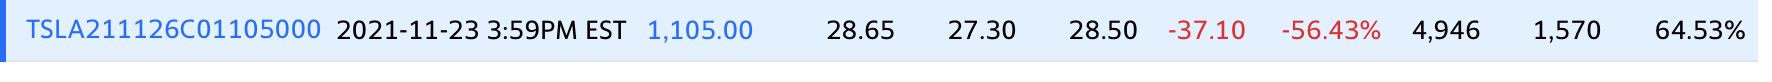

In [3]:
# función para descargar los precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    #  necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

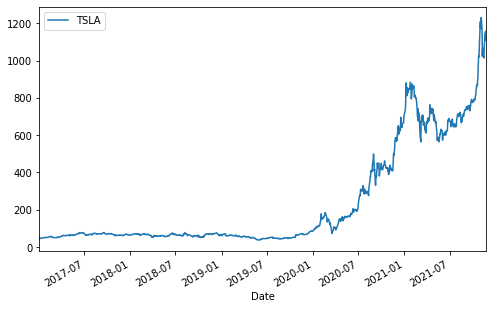

In [4]:
ticker = ['TSLA']
start_date = '2017-01-01'

closes_tsla = get_adj_closes(ticker, start_date)
closes_tsla.plot(figsize=(8,5));
plt.legend(ticker);

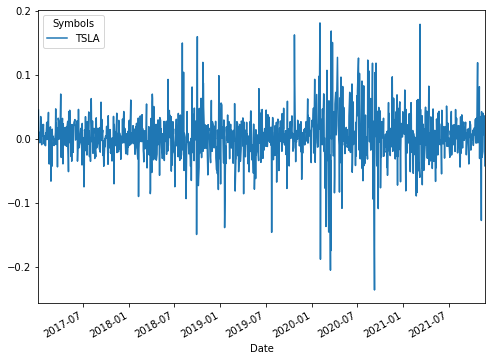

In [5]:
ret_tsla = calc_daily_ret(closes_tsla)
ret_tsla.plot(figsize =(8,6));

In [6]:
# obtenemos el rendimiento simple
Ri = closes_tsla.pct_change(1).iloc[1:]

# obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,TSLA
Date,
2017-01-04,0.046
2017-01-05,-0.001
2017-01-06,0.010
2017-01-09,0.010
2017-01-10,-0.006
...,...
2021-11-17,0.033
2021-11-18,0.007
2021-11-19,0.037


In [7]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = '2022-05-20'

nscen = 10000
dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')
ndays = len(dates)
dates, ndays

(DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
                '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
                '2021-12-03', '2021-12-06',
                ...
                '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
                '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
                '2022-05-19', '2022-05-20'],
               dtype='datetime64[ns]', length=129, freq='B'), 129)

In [8]:
ri = calc_daily_ret(closes_tsla)

# media y DE de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# simulador del rendimiento 
dt = 1
Z = np.random.randn(ndays,nscen) 

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# simulacion normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R * dt + Z * sigma_r * np.sqrt(dt),
                     index = dates)

# simulacion del precio
S_0 = closes_tsla.iloc[-1,0]
S_T = S_0*np.exp(sim_ret_ri.cumsum())

In [9]:
mu = ret_tsla.mean()[0]
sigma = ret_tsla.std()[0]
mu, sigma

(0.0026305419927991074, 0.0379263331559284)

In [10]:
# tasa de bonos de 1 año de fecha 19/11/2021 -> 0.18%
r = 0.00018/360 # Tasa diaria

In [11]:
today = pd.to_datetime(date.today())
expiry = '2022-05-20'

dates = pd.date_range(start = today, 
                      end = expiry, 
                      freq = 'B')

ndays = len(dates)
nscen = 10
dates

DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-06',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', length=129, freq='B')

In [12]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-0.015,-0.009,-0.039,...,0.011,-0.049,0.049
2021-11-24,-0.050,-0.026,-0.089,...,0.014,-0.037,0.007
2021-11-25,-0.019,-0.039,-0.131,...,-0.040,0.011,0.005
2021-11-26,-0.031,-0.027,-0.098,...,0.028,0.033,-0.031
2021-11-29,-0.003,0.079,-0.143,...,0.024,0.024,-0.064
...,...,...,...,...,...,...,...
2022-05-16,0.233,0.073,0.256,...,-0.026,0.483,0.301
2022-05-17,0.270,0.071,0.190,...,-0.012,0.518,0.299
2022-05-18,0.237,0.028,0.166,...,-0.060,0.559,0.333
2022-05-19,0.188,0.009,0.130,...,-0.115,0.559,0.336


In [13]:
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r, 
                       index = dates)
sim_ret.cumsum()

,0,1,2,...,7,8,9
2021-11-23,-2.974e-02,0.009,0.026,...,0.013,-0.043,-0.040
2021-11-24,-2.602e-02,0.061,0.010,...,0.001,-0.024,-0.064
2021-11-25,-3.485e-04,0.106,0.007,...,-0.047,-0.052,-0.077
2021-11-26,-3.320e-02,0.139,-0.017,...,-0.040,-0.019,-0.132
2021-11-29,-8.156e-02,0.152,-0.044,...,-0.043,0.033,-0.094
...,...,...,...,...,...,...,...
2022-05-16,1.050e-01,1.313,-0.255,...,0.778,0.400,0.205
2022-05-17,1.234e-01,1.270,-0.283,...,0.832,0.362,0.211
2022-05-18,8.305e-02,1.301,-0.315,...,0.826,0.396,0.213
2022-05-19,5.783e-02,1.283,-0.275,...,0.758,0.379,0.256


In [14]:
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2021-11-23,1076.535,1118.542,1137.952,...,1123.720,1062.075,1065.110
2021-11-24,1080.551,1178.404,1120.321,...,1110.580,1082.517,1040.771
2021-11-25,1108.644,1233.315,1117.269,...,1058.210,1053.103,1026.936
2021-11-26,1072.813,1274.612,1090.731,...,1065.528,1088.141,972.223
2021-11-29,1022.166,1291.466,1061.147,...,1062.315,1146.447,1009.257
...,...,...,...,...,...,...,...
2022-05-16,1231.837,4121.412,859.827,...,2413.628,1655.230,1361.840
2022-05-17,1254.685,3947.830,835.441,...,2549.545,1593.099,1370.058
2022-05-18,1205.062,4074.200,809.630,...,2533.405,1648.525,1372.508
2022-05-19,1175.052,4000.239,842.101,...,2365.620,1619.529,1432.077


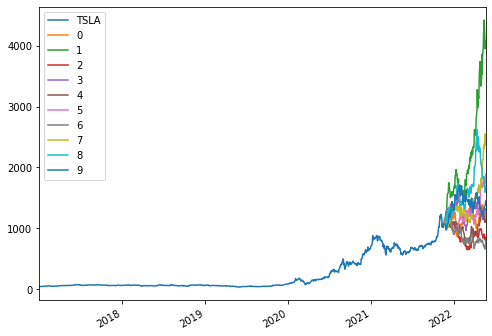

In [15]:
# Precios simulados con los precios descargados
pd.concat([closes_tsla,sim_closes]).plot(figsize = (8,6));

In [16]:
from datetime import date
Hoy = date.today()
expiry = '2022-05-20'
# strike price
K = 1100 
nscen = 100000
dates = pd.date_range(start= Hoy, 
                      periods = ndays)
ndays = len(dates)
# condición inicial del precio a simular
S0 = closes_tsla.iloc[-1,0]  

# simular rendimientos
sim_ret = pd.DataFrame(sigma * np.random.randn(ndays,nscen) + r,
                       index = dates)

# simular los precios
sim_closes = S0*np.exp(sim_ret.cumsum())

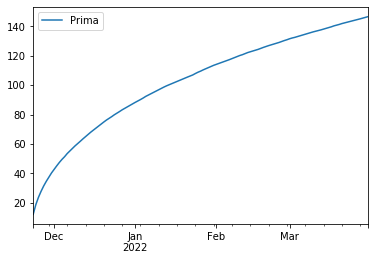

In [17]:
# valor del call 
strike = 1100
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes, 0).mean(axis=1)}, 
                    index = dates)
call.plot();

In [18]:
call.iloc[-1]

Prima    146.4
Name: 2022-03-31 00:00:00, dtype: float64

In [19]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc = mean_est, scale = sigma_est)
i2 = st.norm.interval(confianza, loc = mean_est, scale=sigma_est)
print(i1)
print(i2)

(142.99146169937097, 149.80761502460945)
(142.99150294993206, 149.80757377404836)


In [20]:
vol = ret_tsla['TSLA'].std()*np.sqrt(252)
media = ret_tsla['TSLA'].mean()*252
maduracion = ndays
st = closes_tsla.iloc[-1,0]
rf = r*360

In [21]:
#Black Scholes
from scipy.stats import norm
d1 = (np.log(st/K)+(rf+(vol**2)/2))/vol
d2 = d1-vol
put = K*np.exp(-rf)*norm.cdf(-d2)-st*norm.cdf(-d1)
print('El valor de la opción con Black Scholes es:',put)
print('Valor de la opción simulado es de:',call.iloc[-1].values)

El valor de la opción con Black Scholes es: 256.72528554694026
Valor de la opción simulado es de: [146.39953836]


In [22]:
# Procedimiento de Cristina